In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/PCB_QM/object_detection

/content/gdrive/MyDrive/PCB_QM/object_detection


In [3]:
# yolo v8를 다운 받기 위해
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.0/800.0 kB 15.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [4]:
# 라벨링 데이터 다운로드
!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="AkkCvjSnAbB0yd1BEg7x")
project = rf.workspace("pcbdefect").project("pcb-detection-xwqto")
version = project.version(30)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.52, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to pcb-detection-30 in yolov8:: 100%|██████████| 3623/3623 [00:28<00:00, 127.77it/s]


# 모델 정의

In [6]:
from ultralytics import YOLO

In [7]:
loadedModel = YOLO(model = "yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 188MB/s]


## 모델 훈련

In [8]:
#yaml path 는 반드시 절대경로로 해야함.
yaml_path = "/content/gdrive/MyDrive/PCB_QM/object_detection/pcb-detection-30/data.yaml"
# yaml 데이터 내의 train, val 의 위치가 이상하게 저장되는 경우가 있어. 그래서 그것만 수정해주자.
loadedModel.train(data= yaml_path,
            epochs = 30,
            patience = 5,
            batch = 32)

Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/PCB_QM/object_detection/pcb-detection-30/data.yaml, epochs=30, time=None, patience=5, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 11.0MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/PCB_QM/object_detection/pcb-detection-30/train/labels... 1671 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1671/1671 [00:27<00:00, 60.09it/s] 


train: New cache created: /content/gdrive/MyDrive/PCB_QM/object_detection/pcb-detection-30/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/gdrive/MyDrive/PCB_QM/object_detection/pcb-detection-30/valid/labels... 136 images, 0 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:02<00:00, 51.35it/s]


val: New cache created: /content/gdrive/MyDrive/PCB_QM/object_detection/pcb-detection-30/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      5.27G      3.569      6.834      1.716         43        640: 100%|██████████| 53/53 [00:53<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:03<00:01,  1.57s/it]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]

                   all        136        581          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.42G       2.68      4.003      1.199         58        640: 100%|██████████| 53/53 [00:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all        136        581      0.655      0.158      0.336      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.46G      2.365      2.892       1.11         38        640: 100%|██████████| 53/53 [00:45<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all        136        581      0.577      0.478      0.494      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.48G      2.174      2.282      1.074         46        640: 100%|██████████| 53/53 [00:47<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]


                   all        136        581      0.665      0.473      0.521      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.47G      2.123       1.99       1.05         23        640: 100%|██████████| 53/53 [00:46<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


                   all        136        581      0.748      0.591      0.659      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.43G      2.023      1.762      1.012         23        640: 100%|██████████| 53/53 [00:49<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all        136        581      0.751      0.596      0.676       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.37G       1.97      1.553      1.014         24        640: 100%|██████████| 53/53 [00:44<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all        136        581      0.875      0.659      0.759      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.49G      1.914      1.438     0.9959         44        640: 100%|██████████| 53/53 [00:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


                   all        136        581      0.888      0.637      0.767      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.46G      1.892      1.397     0.9891         21        640: 100%|██████████| 53/53 [00:47<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all        136        581      0.782       0.74      0.773       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.47G      1.845      1.303      0.979         38        640: 100%|██████████| 53/53 [00:45<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


                   all        136        581      0.866      0.688      0.772      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.46G       1.84      1.269     0.9773         47        640: 100%|██████████| 53/53 [00:49<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]


                   all        136        581      0.853      0.774      0.816      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.43G      1.797      1.218     0.9711         40        640: 100%|██████████| 53/53 [00:46<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


                   all        136        581      0.896      0.746      0.816      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.46G       1.77      1.166      0.967         21        640: 100%|██████████| 53/53 [00:48<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all        136        581      0.877        0.8      0.845      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.46G      1.749      1.132     0.9544         47        640: 100%|██████████| 53/53 [00:45<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]

                   all        136        581      0.912      0.772      0.831      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.41G      1.717      1.127     0.9466         28        640: 100%|██████████| 53/53 [00:46<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all        136        581      0.888       0.79      0.846      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.46G      1.738      1.107     0.9417         51        640: 100%|██████████| 53/53 [00:47<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


                   all        136        581      0.926      0.782      0.866      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.37G      1.696      1.046     0.9444         50        640: 100%|██████████| 53/53 [00:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]


                   all        136        581      0.884      0.799       0.86      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.49G      1.694      1.036     0.9347         40        640: 100%|██████████| 53/53 [00:48<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all        136        581      0.909      0.819      0.873      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.47G      1.645      1.002     0.9282         47        640: 100%|██████████| 53/53 [00:46<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all        136        581       0.88      0.808      0.865      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.37G      1.646     0.9859     0.9249         52        640: 100%|██████████| 53/53 [00:46<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


                   all        136        581      0.932      0.818      0.877      0.428
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.78G      1.547     0.8877       0.94         28        640: 100%|██████████| 53/53 [00:52<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all        136        581      0.921      0.829      0.876      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       4.4G      1.531     0.8508     0.9343         30        640: 100%|██████████| 53/53 [00:43<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all        136        581      0.941      0.798      0.875      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.38G      1.466     0.8378     0.9183         31        640: 100%|██████████| 53/53 [00:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        136        581      0.909      0.841      0.882      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       4.4G      1.477     0.8135     0.9243         26        640: 100%|██████████| 53/53 [00:44<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        136        581      0.897      0.837      0.874      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       4.4G      1.446     0.7954     0.9154         28        640: 100%|██████████| 53/53 [00:45<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]


                   all        136        581      0.929      0.825      0.886      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.39G      1.409      0.778     0.9078         24        640: 100%|██████████| 53/53 [00:43<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all        136        581      0.907      0.828      0.875      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       4.4G      1.397     0.7678     0.9076         28        640: 100%|██████████| 53/53 [00:45<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]

                   all        136        581      0.907       0.83      0.873      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       4.4G      1.389     0.7458     0.9016         33        640: 100%|██████████| 53/53 [00:42<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]


                   all        136        581        0.9      0.844      0.881      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       4.4G       1.35     0.7314     0.8992         26        640: 100%|██████████| 53/53 [00:45<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all        136        581      0.912      0.841      0.885      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.39G      1.339     0.7263      0.896         31        640: 100%|██████████| 53/53 [00:43<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all        136        581      0.915      0.833      0.885      0.448



30 epochs completed in 0.430 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.52 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


                   all        136        581      0.915      0.833      0.885      0.448
          missing_hole         23        101      0.994          1      0.995      0.571
            mouse_bite         23         95      0.929      0.828      0.898      0.439
          open_circuit         23         87      0.839      0.701        0.8      0.403
                  spur         28        123      0.867      0.798      0.824      0.383
       spurious_copper         39        175      0.944       0.84       0.91      0.444
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bbf14f2bf70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [9]:
best_weight_path = '/content/gdrive/MyDrive/PCB_QM/object_detection/runs/detect/train/weights/best.pt'
model = YOLO(model = best_weight_path)

In [10]:
imgPath = "/content/gdrive/MyDrive/PCB_QM/PCB_DATASET/rotation/Open_circuit_rotation/04_open_circuit_16.jpg"
model.predict(imgPath,save = True)


image 1/1 /content/gdrive/MyDrive/PCB_QM/PCB_DATASET/rotation/Open_circuit_rotation/04_open_circuit_16.jpg: 576x640 1 open_circuit, 77.9ms
Speed: 3.4ms preprocess, 77.9ms inference, 2.7ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'missing_hole', 1: 'mouse_bite', 2: 'open_circuit', 3: 'short', 4: 'spur', 5: 'spurious_copper'}
 obb: None
 orig_img: array([[[143, 148, 151],
         [143, 148, 151],
         [143, 148, 151],
         ...,
         [143, 148, 151],
         [143, 148, 151],
         [143, 148, 151]],
 
        [[143, 148, 151],
         [143, 148, 151],
         [143, 148, 151],
         ...,
         [143, 148, 151],
         [143, 148, 151],
         [143, 148, 151]],
 
        [[143, 148, 151],
         [143, 148, 151],
         [143, 148, 151],
         ...,
         [143, 148, 151],
         [143, 148, 151],
         [143, 148, 151]],
 
        ...,
 
        [[143, 148, 151],
         [143, 148, 151],
         [143, 148, 151],
         ...,
         [143, 148, 151],
         [143, 148, 151],
         [143, 148, 151]],
 
        [[143, 148, 151

## 모델 세부 수정

In [14]:
import cv2
import matplotlib.pyplot as plt

In [11]:
result = model.predict(imgPath)[0]


image 1/1 /content/gdrive/MyDrive/PCB_QM/PCB_DATASET/rotation/Open_circuit_rotation/04_open_circuit_16.jpg: 576x640 1 open_circuit, 10.5ms
Speed: 3.8ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)


In [12]:
result.orig_img

array([[[143, 148, 151],
        [143, 148, 151],
        [143, 148, 151],
        ...,
        [143, 148, 151],
        [143, 148, 151],
        [143, 148, 151]],

       [[143, 148, 151],
        [143, 148, 151],
        [143, 148, 151],
        ...,
        [143, 148, 151],
        [143, 148, 151],
        [143, 148, 151]],

       [[143, 148, 151],
        [143, 148, 151],
        [143, 148, 151],
        ...,
        [143, 148, 151],
        [143, 148, 151],
        [143, 148, 151]],

       ...,

       [[143, 148, 151],
        [143, 148, 151],
        [143, 148, 151],
        ...,
        [143, 148, 151],
        [143, 148, 151],
        [143, 148, 151]],

       [[143, 148, 151],
        [143, 148, 151],
        [143, 148, 151],
        ...,
        [143, 148, 151],
        [143, 148, 151],
        [143, 148, 151]],

       [[143, 148, 151],
        [143, 148, 151],
        [143, 148, 151],
        ...,
        [143, 148, 151],
        [143, 148, 151],
        [143, 148, 151]]

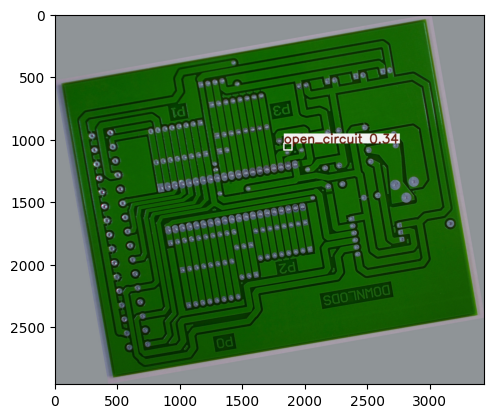

In [15]:
plt.imshow(result.plot())

In [16]:
model_names = model.names
model_names

{0: 'missing_hole',
 1: 'mouse_bite',
 2: 'open_circuit',
 3: 'short',
 4: 'spur',
 5: 'spurious_copper'}


image 1/1 /content/gdrive/MyDrive/PCB_QM/PCB_DATASET/rotation/Open_circuit_rotation/04_open_circuit_10.jpg: 544x640 2 open_circuits, 1 spur, 10.8ms
Speed: 4.3ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)


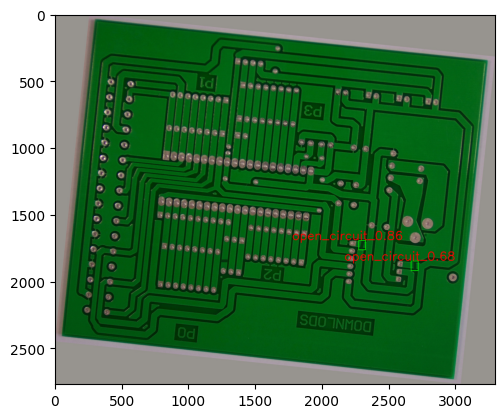

In [28]:
img_path = "/content/gdrive/MyDrive/PCB_QM/PCB_DATASET/rotation/Open_circuit_rotation/04_open_circuit_10.jpg"
detection = model(img_path)[0]
boxinfos = detection.boxes.data.tolist()
img = cv2.imread(img_path,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
threshold = 0.4
for data in boxinfos :
    x1,y1,x2,y2 = map(int,data[:4])
    confidence_score = round(data[4],2)
    classid = int(data[5])
    name = model_names[classid]
    if confidence_score > threshold:
        model_text = f'{name}_{confidence_score}'
        cv2.rectangle(img, (x1,y1),(x2,y2),(0,255,0),3)
        cv2.putText(img,
                    text= model_text,
                    org = (x1-500, y1 - 5),
                    fontFace = cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale  = 3,
                    color = (255,0,0),
                    thickness = 5)
plt.imshow(img)
